# Project 1: Diaspora Earnings Snapshot

I wanted to get comfortable with a brand-new dataset, so I grabbed the `Lab4_diasporas.csv` file from the Computing in Context exercises. It tracks Cuban- and Dominican-born residents in the United States and Puerto Rico based on IPUMS microdata. My research question: **How do income patterns differ between these two diaspora groups.

## Data loading and quick peek
Before touching any numbers, I import the usual libraries (plus `Path` so the notebook adapts if I move it) and load the CSV into a pandas DataFrame.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

DATA_PATH = Path('Lab4_diasporas.csv')
df = pd.read_csv(DATA_PATH)
print(f'Total rows: {len(df):,}')
df.head()

Total rows: 12,197


,cntry,year,sample,serial,persons,wthh,subsamp,regionw,pernum,wtper,...,edattan_pop,edattand_mom,edattand_pop,occisco_mom,occisco_pop,occ_mom,occ_pop,cuban,ageimm,dominic
0,United States,2005,United States 2005,249400000.0,5,53.0,69th 1% subsample,North America,3,48.0,...,Primary completed,Primary (6 yrs) completed,Primary (6 yrs) completed,NIU (not in universe),Crafts and related trades workers,0.0,731.0,1.0,11.0,0.0
1,United States,2005,United States 2005,769657000.0,1,360.0,63rd 1% subsample,North America,1,380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,40.0,0.0
2,United States,2005,United States 2005,308202000.0,3,73.0,77th 1% subsample,North America,1,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,42.0,0.0
3,Puerto Rico,2005,Puerto Rico 2005,5414000.0,3,54.0,99th 1% subsample,Caribbean,3,63.0,...,NaN,"Secondary, general track completed",NaN,Service workers and shop and market sales,NaN,411.0,NaN,0.0,NaN,1.0
4,United States,2005,United States 2005,249554000.0,4,77.0,66th 1% subsample,North America,1,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,32.0,0.0


## Pandas-powered summary stats
The `inctot` column reports total personal income in the survey year. I start by letting pandas compute the mean, median, and mode so I have a baseline. Nothing is hard-coded: if new rows show up, the calculations will adjust automatically.

In [2]:
income_col = 'inctot'
pandas_mean = df[income_col].mean()
pandas_median = df[income_col].median()
pandas_mode = df[income_col].mode()  # IPUMS data can be multi-modal

print('Pandas summary for inctot')
print(f"Mean:   ${pandas_mean:,.2f}")
print(f"Median: ${pandas_median:,.2f}")
print('Mode(s):')
for value in pandas_mode:
    print(f"  ${value:,.2f}")

Pandas summary for inctot
Mean:   $24,814.40
Median: $14,261.00
Mode(s):
  $0.00


## double-check using library
To make sure I can reproduce the same stats without pandas, I read the CSV with the `csv` module and lean on `statistics` for the heavy lifting. This is intentionally the “hard way,” but it confirms that my earlier answers were not pandas magic.

In [3]:
import csv
from statistics import mean, median, multimode

with DATA_PATH.open(newline='') as f:
    reader = csv.DictReader(f)
    incomes = []
    for row in reader:
        value = row.get(income_col)
        if value in (None, ''):
            continue
        try:
            incomes.append(float(value))
        except ValueError:
            continue

py_mean = mean(incomes)
py_median = median(incomes)
py_modes = multimode(incomes)

print('Pure Python summary for inctot')
print(f"Mean:   ${py_mean:,.2f}")
print(f"Median: ${py_median:,.2f}")
print('Mode(s):')
for value in py_modes:
    print(f"  ${value:,.2f}")

print()
print('Differences versus pandas (should be ~0):')
print(f"Mean delta:   {py_mean - pandas_mean:.6f}")
print(f"Median delta: {py_median - pandas_median:.6f}")

Pure Python summary for inctot


Mean:   $24,814.40
Median: $14,261.00
Mode(s):
  $0.00

Differences versus pandas (should be ~0):
Mean delta:   0.000000
Median delta: 0.000000


## Visualizing diaspora differences
The file only includes people born in Cuba or the Dominican Republic. I compare their mean incomes to illustrate how the groups differ. The bar chart keeps axis labels, a title, and currency units so it reads cleanly even on a narrow laptop screen.

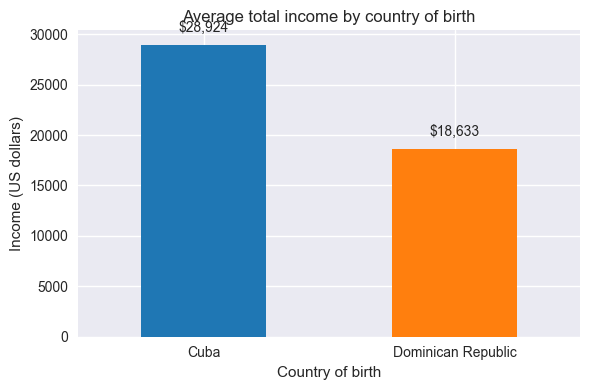

In [4]:
top_origins = df['bplctry'].value_counts().index
top_df = df[df['bplctry'].isin(top_origins)]
origin_summary = top_df.groupby('bplctry')[income_col].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 4))
origin_summary.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Average total income by country of birth')
ax.set_ylabel('Income (US dollars)')
ax.set_xlabel('Country of birth')
ax.tick_params(axis='x', rotation=0)
for idx, value in enumerate(origin_summary.values):
    ax.text(idx, value + 1000, f"${value:,.0f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()